In [1]:
#미완성입니다!!! 저장하고 다시 해보려고 저장하는 것!!!!!!!

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recruit-restaurant-visitor-forecasting/air_reserve.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/hpg_store_info.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/hpg_reserve.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/sample_submission.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/air_visit_data.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/air_store_info.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/date_info.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/store_id_relation.csv.zip


In [3]:
#data load
air_reserve = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/air_reserve.csv.zip')
hpg_store_info = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/hpg_store_info.csv.zip')
hpg_reserve = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/hpg_reserve.csv.zip')
air_visit_data = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/air_visit_data.csv.zip')
air_store_info = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/air_store_info.csv.zip')
date_info = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/date_info.csv.zip')
store_id_relation = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/store_id_relation.csv.zip')
sample_sub = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/sample_submission.csv.zip')

In [4]:
#data check

print(air_store_info.shape)
air_store_info.head()

(829, 5)


,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [5]:
print(air_reserve.shape)
air_reserve.head()

(92378, 4)


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [6]:
#air로 예약가능한 식당 수
air_reserve.air_store_id.nunique()

314

In [7]:
print(air_visit_data.shape)
air_visit_data.head()

(252108, 3)


,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [8]:
#air_visit_data의 모든 store id가 air_sotre의 store id에 있는지 확인
air_visit_data.air_store_id.isin(air_store_info.air_store_id).all()

True

In [9]:
print(hpg_store_info.shape)
hpg_store_info.head()

(4690, 5)


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [10]:
print(hpg_reserve.shape)
hpg_reserve.head()

(2000320, 4)


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [11]:
#hpg로 예약 가능한 식당 수
hpg_reserve.hpg_store_id.nunique()

13325

In [12]:
print(date_info.shape)
date_info.head()

(517, 3)


,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [13]:
print(store_id_relation.shape)
store_id_relation.head()

(150, 2)


,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [14]:
#id, hpg 둘 다 사용가능한 식당 수 
store_id_relation.air_store_id.nunique()

150

In [15]:
#target 확인
print(sample_sub.shape)
sample_sub

(32019, 2)


,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0
...,...,...
32014,air_fff68b929994bfbd_2017-05-27,0
32015,air_fff68b929994bfbd_2017-05-28,0
32016,air_fff68b929994bfbd_2017-05-29,0
32017,air_fff68b929994bfbd_2017-05-30,0


In [16]:
#target에서 id에 있는 air_store_id, date 분리

id_split = sample_sub['id'].str.split('_', expand=True)
id_split.columns = ['source', 'store_id', 'visit_date']

sample_sub = pd.concat([sample_sub, id_split], axis=1)

sample_sub['air_store_id']=sample_sub['source'].str.cat(sample_sub['store_id'], sep='_')
sample_sub = sample_sub[['id', 'air_store_id', 'visit_date', 'visitors']]
sample_sub['visit_date'] = pd.to_datetime(sample_sub['visit_date'])

sample_sub.head()

,id,air_store_id,visit_date,visitors
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,0


In [17]:
#tartget에 있는 stores 수
sample_sub.air_store_id.nunique()

821

In [18]:
air_visit_data['id'] = air_visit_data['air_store_id'].str.cat(air_visit_data['visit_date'].astype(str), sep='_')

In [19]:
train_dt = pd.concat([air_visit_data, sample_sub], axis=0, keys=['past','future'], names=['dataset']).reset_index(level='dataset').reset_index(drop=True)

In [20]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284127 entries, 0 to 284126
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   dataset       284127 non-null  object
 1   air_store_id  284127 non-null  object
 2   visit_date    284127 non-null  object
 3   visitors      284127 non-null  int64 
 4   id            284127 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.8+ MB


In [21]:
train_dt

,dataset,air_store_id,visit_date,visitors,id
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18
...,...,...,...,...,...
284122,future,air_fff68b929994bfbd,2017-05-27 00:00:00,0,air_fff68b929994bfbd_2017-05-27
284123,future,air_fff68b929994bfbd,2017-05-28 00:00:00,0,air_fff68b929994bfbd_2017-05-28
284124,future,air_fff68b929994bfbd,2017-05-29 00:00:00,0,air_fff68b929994bfbd_2017-05-29
284125,future,air_fff68b929994bfbd,2017-05-30 00:00:00,0,air_fff68b929994bfbd_2017-05-30


In [22]:
#air, hpg store info, reserve 병합

#target의 store id가 air_store_id에 있는지 확인
sample_sub.air_store_id.isin(air_store_info.air_store_id).all()

True

In [23]:
stores_info = pd.merge(air_store_info, store_id_relation, how = 'left', on = 'air_store_id')
print(stores_info.shape)
stores_info.head()

(829, 6)


,air_store_id,air_genre_name,air_area_name,latitude,longitude,hpg_store_id
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,hpg_9b38b9e13da6da27
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN


In [24]:
stores_info = pd.merge(stores_info, hpg_store_info, how='left', on='hpg_store_id', suffixes=['_air','_hpg'])
print(stores_info.shape)
stores_info.head()

(829, 10)


,air_store_id,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,hpg_9b38b9e13da6da27,NaN,NaN,NaN,NaN
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN


In [25]:
#reserve data 병합
hpg_reserve = pd.merge(hpg_reserve, store_id_relation, on='hpg_store_id')[air_reserve.columns]

In [26]:
hpg_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_db80363d35f10926,2016-01-01 19:00:00,2016-01-01 15:00:00,4
1,air_db80363d35f10926,2016-01-02 19:00:00,2016-01-02 14:00:00,2
2,air_db80363d35f10926,2016-01-03 18:00:00,2016-01-02 20:00:00,6
3,air_db80363d35f10926,2016-01-06 20:00:00,2016-01-04 22:00:00,3
4,air_db80363d35f10926,2016-01-11 18:00:00,2016-01-11 14:00:00,2


In [27]:
reserve_info = pd.concat([air_reserve, hpg_reserve], axis=0)
print(reserve_info.shape)
reserve_info.head()

(120561, 4)


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [28]:
#visit data 병합
air_visit_data.visit_date = pd.to_datetime(air_visit_data.visit_date)
air_visit_data.head()

,air_store_id,visit_date,visitors,id
0,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13
1,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14
2,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15
3,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16
4,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18


In [29]:
#day-to-day visitors
visitors_by_date = air_visit_data.groupby('visit_date').sum()
visitors_by_date.head()

,visitors
visit_date,
2016-01-01,1033
2016-01-02,1764
2016-01-03,2368
2016-01-04,3326
2016-01-05,3927


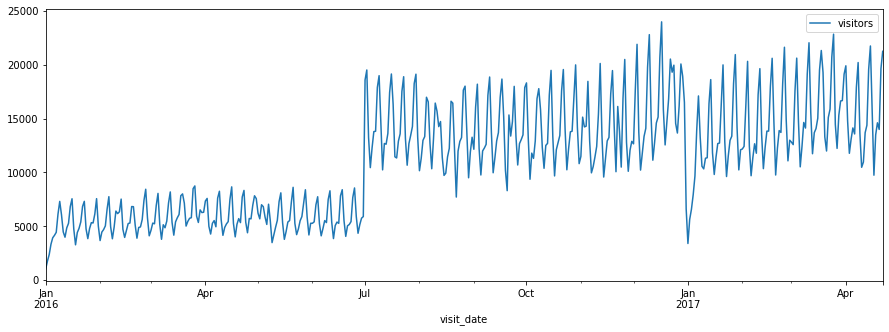

In [30]:
ax = visitors_by_date.plot(figsize=[15,5])

In [31]:
#each day of week visitors
air_visit_data['weekday'] = air_visit_data.visit_date.dt.weekday

In [32]:
air_visit_data.head()

,air_store_id,visit_date,visitors,id,weekday
0,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2
1,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3
2,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4
3,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5
4,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0


In [33]:
visitors_by_weekday = air_visit_data.groupby('weekday')['visitors'].sum()

Text(0.5, 0, 'weekday (monday=, sunday=6)')

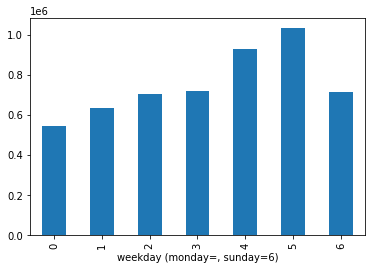

In [34]:
ax = visitors_by_weekday.plot.bar()
ax.set_xlabel('weekday (monday=, sunday=6)')

<AxesSubplot:>

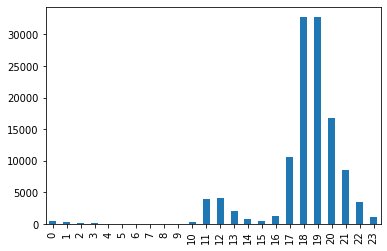

In [35]:
#reserve visitors by time(24h)

reserve_info.visit_datetime = pd.to_datetime(reserve_info.visit_datetime)

reserve_info.visit_datetime.dt.hour.value_counts().sort_index().plot.bar()

In [36]:
### 위 내용까지가 데이터 시각화 및 분석, 관계 나타낸 것 ###

In [37]:
##### --------------------- #####

In [38]:
#### feature engineering ####

In [39]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284127 entries, 0 to 284126
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   dataset       284127 non-null  object
 1   air_store_id  284127 non-null  object
 2   visit_date    284127 non-null  object
 3   visitors      284127 non-null  int64 
 4   id            284127 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.8+ MB


In [40]:
train_dt.visit_date = pd.to_datetime(train_dt.visit_date)

In [41]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284127 entries, 0 to 284126
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   dataset       284127 non-null  object        
 1   air_store_id  284127 non-null  object        
 2   visit_date    284127 non-null  datetime64[ns]
 3   visitors      284127 non-null  int64         
 4   id            284127 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 10.8+ MB


In [42]:
#about Date features

train_dt['weekday'] = train_dt.visit_date.dt.dayofweek
train_dt['year'] = train_dt.visit_date.dt.year
train_dt['month'] = train_dt.visit_date.dt.month
train_dt['day_of_year'] = train_dt.visit_date.dt.dayofyear
train_dt['days_in_month'] = train_dt.visit_date.dt.days_in_month
train_dt['week_of_year'] = train_dt.visit_date.dt.weekofyear
train_dt['is_month_end'] = train_dt.visit_date.dt.is_month_end

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [43]:
train_dt.head()

,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2,2016,1,13,31,2,False
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3,2016,1,14,31,2,False
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4,2016,1,15,31,2,False
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5,2016,1,16,31,2,False
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0,2016,1,18,31,3,False


In [44]:
#시작 시간(? / 데이터에 있는 가장 첫 날짜
train_dt.visit_date.min()

Timestamp('2016-01-01 00:00:00')

In [45]:
first_day = pd.to_datetime('2016-01-01')

In [46]:
#데이터 내의 날짜들이 가장 첫 날짜로부터 얼마나 차이 나는지 구하기 위해
train_dt['days_since_20160101'] = (train_dt.visit_date - first_day).apply(lambda dt : dt.days)

In [47]:
#holiday flag

date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [48]:
#date_info table에 휴일 전 후에 대한 정보 칼럼 추가 
date_info['tomorrow_is_holiday'] = date_info.holiday_flg.shift(-1).fillna(0).astype(int)
date_info['yesterday_is_holiday'] = date_info.holiday_flg.shift(1).fillna(0).astype(int)

In [49]:
date_info.head()

,calendar_date,day_of_week,holiday_flg,tomorrow_is_holiday,yesterday_is_holiday
0,2016-01-01,Friday,1,1,0
1,2016-01-02,Saturday,1,1,1
2,2016-01-03,Sunday,1,0,1
3,2016-01-04,Monday,0,0,1
4,2016-01-05,Tuesday,0,0,0


In [50]:
date_info.calendar_date = pd.to_datetime(date_info.calendar_date)

In [51]:
date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   calendar_date         517 non-null    datetime64[ns]
 1   day_of_week           517 non-null    object        
 2   holiday_flg           517 non-null    int64         
 3   tomorrow_is_holiday   517 non-null    int64         
 4   yesterday_is_holiday  517 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 20.3+ KB


In [52]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284127 entries, 0 to 284126
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dataset              284127 non-null  object        
 1   air_store_id         284127 non-null  object        
 2   visit_date           284127 non-null  datetime64[ns]
 3   visitors             284127 non-null  int64         
 4   id                   284127 non-null  object        
 5   weekday              284127 non-null  int64         
 6   year                 284127 non-null  int64         
 7   month                284127 non-null  int64         
 8   day_of_year          284127 non-null  int64         
 9   days_in_month        284127 non-null  int64         
 10  week_of_year         284127 non-null  int64         
 11  is_month_end         284127 non-null  bool          
 12  days_since_20160101  284127 non-null  int64         
dtypes: bool(1), da

In [53]:
train_dt.head()

,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,days_since_20160101
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2,2016,1,13,31,2,False,12
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3,2016,1,14,31,2,False,13
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4,2016,1,15,31,2,False,14
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5,2016,1,16,31,2,False,15
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0,2016,1,18,31,3,False,17


In [54]:
train_dt = pd.merge(left=train_dt, right = date_info.drop('day_of_week', axis = 1), how='left', left_on='visit_date', right_on='calendar_date').drop('calendar_date', axis=1)

In [55]:
train_dt.head()

,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,days_since_20160101,holiday_flg,tomorrow_is_holiday,yesterday_is_holiday
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2,2016,1,13,31,2,False,12,0,0,0
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3,2016,1,14,31,2,False,13,0,0,0
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4,2016,1,15,31,2,False,14,0,0,0
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5,2016,1,16,31,2,False,15,0,0,0
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0,2016,1,18,31,3,False,17,0,0,0


In [56]:
#location features

#위치 데이터를 todofuken(우리나라로 치면 8도 개념), city, street으로 분리
area_split = stores_info.air_area_name.str.split(' ', expand=True)

stores_info["Todofuken"] = area_split[0]
stores_info["city"] = area_split[1]
stores_info["street"] = area_split.iloc[:,2:].apply(lambda row : ' '.join(row.dropna()), axis =1)

stores_info.head()

,air_store_id,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,hpg_9b38b9e13da6da27,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen


In [57]:
#같은 지역 count
n_stores_by_street = stores_info.groupby(['air_area_name']).size().to_frame(name='n_stores_same_street').reset_index()
n_stores_by_city = stores_info.groupby(['Todofuken', 'city']).size().to_frame(name='n_stores_same_city').reset_index()
n_stores_by_Todofuken = stores_info.groupby('Todofuken').size().to_frame(name='n_stores_same_Todofuken').reset_index()

In [58]:
#same street stores
n_stores_by_street.head()

,air_area_name,n_stores_same_street
0,Fukuoka-ken Fukuoka-shi Daimyō,64
1,Fukuoka-ken Fukuoka-shi Hakata Ekimae,16
2,Fukuoka-ken Fukuoka-shi Imaizumi,2
3,Fukuoka-ken Fukuoka-shi Momochi,6
4,Fukuoka-ken Fukuoka-shi Shiobaru,7


In [59]:
#same city stores
n_stores_by_city.head()

,Todofuken,city,n_stores_same_city
0,Fukuoka-ken,Fukuoka-shi,103
1,Fukuoka-ken,Itoshima-shi,7
2,Fukuoka-ken,Kitakyūshū-shi,9
3,Fukuoka-ken,Kurume-shi,6
4,Fukuoka-ken,Yame-shi,2


In [60]:
#same todofuken

n_stores_by_Todofuken

,Todofuken,n_stores_same_Todofuken
0,Fukuoka-ken,127
1,Hiroshima-ken,32
2,Hokkaidō,46
3,Hyōgo-ken,57
4,Miyagi-ken,17
5,Niigata-ken,14
6,Shizuoka-ken,18
7,Tōkyō-to,444
8,Ōsaka-fu,74


In [61]:
#stores_info talbe과 병합
stores_info = pd.merge(left=stores_info, right=n_stores_by_street, how='left', on='air_area_name')
stores_info = pd.merge(left=stores_info, right=n_stores_by_city,how='left', on=['Todofuken', 'city'])
stores_info = pd.merge(left=stores_info, right=n_stores_by_Todofuken, how='left',on='Todofuken')


In [62]:
stores_info.head()

,air_store_id,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri,17,25,57
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,hpg_9b38b9e13da6da27,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri,17,25,57
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri,17,25,57
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri,17,25,57
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444


In [63]:
#train data에 stores info 병합
train_dt = pd.merge(left=train_dt, right=stores_info, how='left', on='air_store_id')
train_dt.head()

,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,...,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2,2016,1,13,31,...,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3,2016,1,14,31,...,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4,2016,1,15,31,...,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5,2016,1,16,31,...,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0,2016,1,18,31,...,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444


In [64]:
reserve_info.reserve_datetime = pd.to_datetime(reserve_info.reserve_datetime)

In [65]:
reserve_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120561 entries, 0 to 28182
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   air_store_id      120561 non-null  object        
 1   visit_datetime    120561 non-null  datetime64[ns]
 2   reserve_datetime  120561 non-null  datetime64[ns]
 3   reserve_visitors  120561 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 4.6+ MB


In [66]:
#reservation feature
reserve_info['planned_visit_date'] = reserve_info.visit_datetime.dt.date.astype('datetime64[ns]')
reserve_info['reserve_date'] = reserve_info.reserve_datetime.dt.date
reserve_info['reserve_ahead'] = reserve_info.visit_datetime - reserve_info.reserve_datetime.astype('datetime64[ns]')
reserve_info['hours_ahead'] = reserve_info.reserve_ahead / pd.Timedelta('1 hour')
reserve_info['days_ahed'] = reserve_info.reserve_ahead.apply(lambda delta_t : delta_t.days)


In [67]:
#reserve summary
reserve_sum = reserve_info.groupby(['air_store_id', 'planned_visit_date'])['reserve_visitors', 'hours_ahead'].agg({'reserve_visitors': ['count','sum'], 'hours_ahead': 'mean'}).reset_index()

reserve_sum.columns = ['air_store_id', 'planned_visit_date', 
                     'n_reserves', 'n_reserve_visitors', 'reserve_avg_hours_ahead']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [68]:
reserve_sum.head()

,air_store_id,planned_visit_date,n_reserves,n_reserve_visitors,reserve_avg_hours_ahead
0,air_00a91d42b08b08d9,2016-01-14,1,2,77.0
1,air_00a91d42b08b08d9,2016-01-15,1,4,142.0
2,air_00a91d42b08b08d9,2016-01-16,1,2,70.0
3,air_00a91d42b08b08d9,2016-01-22,1,2,82.0
4,air_00a91d42b08b08d9,2016-01-29,1,5,144.0


In [69]:
#train_dt에 reserve summary(reserve_sum) table 병합
train_dt = pd.merge(left = train_dt, right = reserve_sum, how='left', left_on = ['air_store_id', 'visit_date'], right_on=['air_store_id', 'planned_visit_date'])

In [70]:
train_dt.head()

,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,...,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,planned_visit_date,n_reserves,n_reserve_visitors,reserve_avg_hours_ahead
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2,2016,1,13,31,...,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaT,NaN,NaN,NaN
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3,2016,1,14,31,...,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaT,NaN,NaN,NaN
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4,2016,1,15,31,...,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaT,NaN,NaN,NaN
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5,2016,1,16,31,...,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaT,NaN,NaN,NaN
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0,2016,1,18,31,...,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaT,NaN,NaN,NaN


<AxesSubplot:>

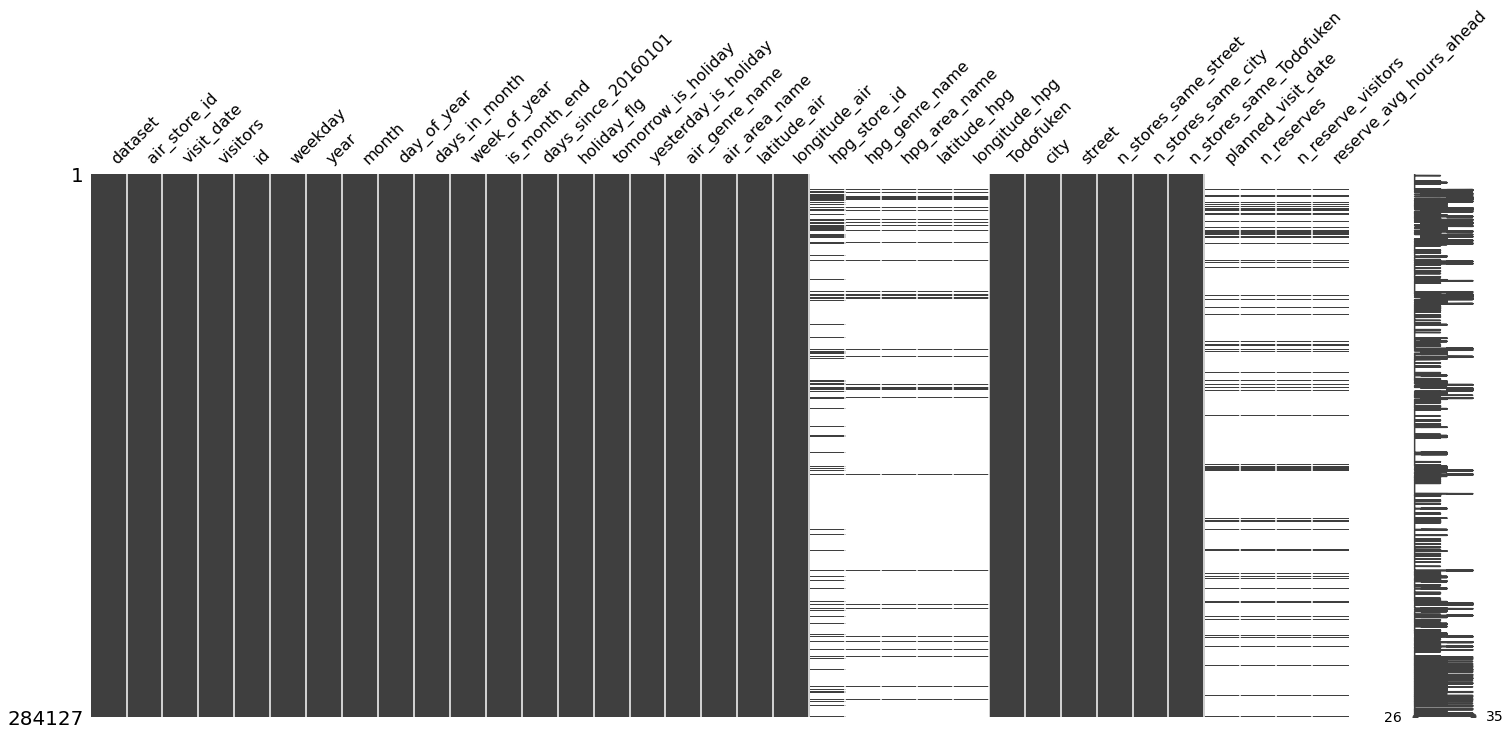

In [71]:
#결측치 확인 

import missingno as msno

msno.matrix(train_dt)

In [72]:
#Interactions between features

train_dt['area_genre'] = train_dt['air_area_name'].astype(str).str.cat(train_dt['air_genre_name'].astype(str))
train_dt['store_weekday'] = train_dt['air_store_id'].astype(str).str.cat(train_dt['weekday'].astype(str))
train_dt['store_weekday_holiday'] = train_dt['store_weekday'].astype(str).str.cat(train_dt['holiday_flg'].astype(str))


In [73]:
#target variable 모두 합치기
#방문자수에 대해 mean, median, max, min을 찾음
#방문자들의 대략적인 추정치를 통계에 근거해서 제시하기 위함임.

group_by_cols = ['air_store_id', 'weekday', 'holiday_flg']

visitors_stats = train_dt.query('dataset == "past"').groupby(group_by_cols)['visitors'].agg(['mean','median','min','max']).rename(columns=lambda colname: str(colname)+'_visitors').reset_index()

In [74]:
train_dt = train_dt.merge(visitors_stats, how='left', on=group_by_cols)

train_dt.head()

,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,...,n_reserves,n_reserve_visitors,reserve_avg_hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2,2016,1,13,31,...,NaN,NaN,NaN,Tōkyō-to Minato-ku ShibakōenDining bar,air_ba937bf13d40fb242,air_ba937bf13d40fb2420,24.095238,25.0,7.0,57.0
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3,2016,1,14,31,...,NaN,NaN,NaN,Tōkyō-to Minato-ku ShibakōenDining bar,air_ba937bf13d40fb243,air_ba937bf13d40fb2430,20.450000,21.0,7.0,45.0
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4,2016,1,15,31,...,NaN,NaN,NaN,Tōkyō-to Minato-ku ShibakōenDining bar,air_ba937bf13d40fb244,air_ba937bf13d40fb2440,35.218750,35.5,17.0,61.0
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5,2016,1,16,31,...,NaN,NaN,NaN,Tōkyō-to Minato-ku ShibakōenDining bar,air_ba937bf13d40fb245,air_ba937bf13d40fb2450,27.828125,27.0,6.0,53.0
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0,2016,1,18,31,...,NaN,NaN,NaN,Tōkyō-to Minato-ku ShibakōenDining bar,air_ba937bf13d40fb240,air_ba937bf13d40fb2400,13.754386,12.0,2.0,34.0


In [75]:
#Reformat Features

train_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284127 entries, 0 to 284126
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   dataset                  284127 non-null  object        
 1   air_store_id             284127 non-null  object        
 2   visit_date               284127 non-null  datetime64[ns]
 3   visitors                 284127 non-null  int64         
 4   id                       284127 non-null  object        
 5   weekday                  284127 non-null  int64         
 6   year                     284127 non-null  int64         
 7   month                    284127 non-null  int64         
 8   day_of_year              284127 non-null  int64         
 9   days_in_month            284127 non-null  int64         
 10  week_of_year             284127 non-null  int64         
 11  is_month_end             284127 non-null  bool          
 12  days_since_20160

In [76]:
train_dt.columns

Index(['dataset', 'air_store_id', 'visit_date', 'visitors', 'id', 'weekday',
       'year', 'month', 'day_of_year', 'days_in_month', 'week_of_year',
       'is_month_end', 'days_since_20160101', 'holiday_flg',
       'tomorrow_is_holiday', 'yesterday_is_holiday', 'air_genre_name',
       'air_area_name', 'latitude_air', 'longitude_air', 'hpg_store_id',
       'hpg_genre_name', 'hpg_area_name', 'latitude_hpg', 'longitude_hpg',
       'Todofuken', 'city', 'street', 'n_stores_same_street',
       'n_stores_same_city', 'n_stores_same_Todofuken', 'planned_visit_date',
       'n_reserves', 'n_reserve_visitors', 'reserve_avg_hours_ahead',
       'area_genre', 'store_weekday', 'store_weekday_holiday', 'mean_visitors',
       'median_visitors', 'min_visitors', 'max_visitors'],
      dtype='object')

In [77]:
##features type check

#categorical columns
cat_cols = ['air_store_id', 'air_genre_name', 'air_area_name', 
            'hpg_genre_name', 'hpg_area_name',
            'Todofuken', 'city', 'street', 
            'area_genre', 'store_weekday', 'store_weekday_holiday'
           ]

#binary columns (T/F or 1/0)
bin_cols = ['is_month_end', 'holiday_flg', 'tomorrow_is_holiday', 'yesterday_is_holiday']

#numeric columns
num_cols = ['weekday', 'year', 'month', 'day_of_year', 'days_in_month', 'week_of_year', 'days_since_20160101', #date
            'latitude_air', 'longitude_air',   #location
            'n_stores_same_street', 'n_stores_same_city', 'n_stores_same_Todofuken',    #neighbor
            'n_reserves', 'n_reserve_visitors', 'reserve_avg_hours_ahead',  #reserves
            'mean_visitors', 'median_visitors', 'min_visitors', 'max_visitors'    #simple aggregation of visitors
           ]    

#id columns
id_col = 'id'

#target column
target_col = 'visitors'

In [78]:
#categorical feature label -> int encoding & one-hot encoding

#categorical, string 라벨을 전부 숫자형(integer)로 변경
from sklearn.preprocessing import LabelEncoder

cat2int_cols = [ cat+'_int' for cat in cat_cols ]    
#a list of column names(strings) 
#범주형에서 정수로 변환된 모든 칼럼을 추적.

cat2int_encoders = {}
#a dictionary of LabelEncoder objects 
#dic 형태는 {'air_store_id': LabelEncoder().fit_transform(full['air_store_id'])}
#범주형 피쳐의 인코딩 변환에 사용됨.

In [79]:

%%time

for cat, cat2int in zip(cat_cols, cat2int_cols):
    encoder = LabelEncoder()
    train_dt[cat2int] = encoder.fit_transform(train_dt[cat].astype(str))
    cat2int_encoders[cat] = encoder

CPU times: user 1.37 s, sys: 21.9 ms, total: 1.39 s
Wall time: 1.39 s


In [80]:
train_dt[cat2int_cols].head()

,air_store_id_int,air_genre_name_int,air_area_name_int,hpg_genre_name_int,hpg_area_name_int,Todofuken_int,city_int,street_int,area_genre_int,store_weekday_int,store_weekday_holiday_int
0,603,4,62,16,31,7,29,77,144,4222,7860
1,603,4,62,16,31,7,29,77,144,4223,7862
2,603,4,62,16,31,7,29,77,144,4224,7864
3,603,4,62,16,31,7,29,77,144,4225,7866
4,603,4,62,16,31,7,29,77,144,4220,7858


In [81]:
#one-hot encoding
#숫자형 라벨을 0 또는 1로 바꿈

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=True)
cat2onehot_sparse = onehot_encoder.fit_transform(train_dt[cat2int_cols])

In [82]:
print(len(cat_cols))
print(cat2onehot_sparse.shape)

11
(284127, 18026)


In [83]:
#범주형(categorical) 칼럼을 원-핫 칼럼으로 형성.
cat2onehot_cols = [ cat+'__is__'+str(level).replace(' ', '_') 
                   for cat in cat_cols for level in cat2int_encoders[cat].classes_]

In [84]:
import random
random.sample(cat2onehot_cols, 20)

['store_weekday__is__air_a218912784bf767d0',
 'store_weekday_holiday__is__air_f85e21e543cf44f221',
 'store_weekday_holiday__is__air_9bf0ccac497c4af350',
 'store_weekday__is__air_fdc02ec4a3d21ea41',
 'store_weekday_holiday__is__air_709262d948dd0b6e41',
 'store_weekday__is__air_a9a380530c1e121f6',
 'store_weekday__is__air_6c952e3c6e5909455',
 'store_weekday__is__air_1707a3f18bb0da070',
 'store_weekday_holiday__is__air_b30fffd7ab1e75a530',
 'store_weekday__is__air_8a59bb0c497b771e5',
 'store_weekday__is__air_f1f9027d4fa8f6530',
 'store_weekday_holiday__is__air_c28983412a7eefcf31',
 'store_weekday_holiday__is__air_2b8b29ddfd35018e51',
 'store_weekday_holiday__is__air_d0a1e69685259c9250',
 'store_weekday__is__air_36bcf77d3382d36e3',
 'store_weekday_holiday__is__air_5d7c744c3a2ef62461',
 'store_weekday_holiday__is__air_54ed43163b7596c400',
 'store_weekday__is__air_9b13c7feb0a0c4311',
 'store_weekday_holiday__is__air_bdd32aa407c1633541',
 'store_weekday__is__air_f88898cd09f404960']

In [85]:
#engineered features save

import os
import pickle
if not os.path.exists('train_set'): os.mkdir('train_set')

    
train_dt.to_pickle('train_set/train_engineered.pkl')

with open('train_set/train_variables.pkl', 'wb') as f:
    pickle.dump([cat_cols, num_cols, bin_cols, id_col, target_col,
                 cat2int_cols, cat2int_encoders, cat2onehot_cols,
                 cat2onehot_sparse], f)

In [86]:
###### 위의 코드까지가 피쳐 엔지니어링 과정 #####

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb

In [88]:
import pickle
with open('train_set/train_variables.pkl', 'rb') as f:
    (cat_cols, num_cols, bin_cols, id_col, target_col, 
    cat2int_cols, cat2int_encoders, cat2onehot_cols, 
    cat2onehot_sparse) = pickle.load(f)

In [89]:
train_dt = pd.read_pickle('train_set/train_engineered.pkl')

In [90]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284127 entries, 0 to 284126
Data columns (total 53 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   dataset                    284127 non-null  object        
 1   air_store_id               284127 non-null  object        
 2   visit_date                 284127 non-null  datetime64[ns]
 3   visitors                   284127 non-null  int64         
 4   id                         284127 non-null  object        
 5   weekday                    284127 non-null  int64         
 6   year                       284127 non-null  int64         
 7   month                      284127 non-null  int64         
 8   day_of_year                284127 non-null  int64         
 9   days_in_month              284127 non-null  int64         
 10  week_of_year               284127 non-null  int64         
 11  is_month_end               284127 non-null  bool    

In [91]:
train_dt.head()

,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,...,air_genre_name_int,air_area_name_int,hpg_genre_name_int,hpg_area_name_int,Todofuken_int,city_int,street_int,area_genre_int,store_weekday_int,store_weekday_holiday_int
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2,2016,1,13,31,...,4,62,16,31,7,29,77,144,4222,7860
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3,2016,1,14,31,...,4,62,16,31,7,29,77,144,4223,7862
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4,2016,1,15,31,...,4,62,16,31,7,29,77,144,4224,7864
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5,2016,1,16,31,...,4,62,16,31,7,29,77,144,4225,7866
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0,2016,1,18,31,...,4,62,16,31,7,29,77,144,4220,7858


In [92]:
#숫자형과 위에서 정수로 바뀐 범주형 칼럼만 사용함.

use_cols = num_cols + bin_cols + cat2int_cols

print(use_cols)
print('개수 :', len(use_cols))

['weekday', 'year', 'month', 'day_of_year', 'days_in_month', 'week_of_year', 'days_since_20160101', 'latitude_air', 'longitude_air', 'n_stores_same_street', 'n_stores_same_city', 'n_stores_same_Todofuken', 'n_reserves', 'n_reserve_visitors', 'reserve_avg_hours_ahead', 'mean_visitors', 'median_visitors', 'min_visitors', 'max_visitors', 'is_month_end', 'holiday_flg', 'tomorrow_is_holiday', 'yesterday_is_holiday', 'air_store_id_int', 'air_genre_name_int', 'air_area_name_int', 'hpg_genre_name_int', 'hpg_area_name_int', 'Todofuken_int', 'city_int', 'street_int', 'area_genre_int', 'store_weekday_int', 'store_weekday_holiday_int']
개수 : 34


In [93]:
#past와 future를 train_dt에서 분리

past = train_dt.query('dataset=="past"')
future  = train_dt.query('dataset=="future"')

In [94]:
print('Past data set:')
print(past.shape)
past.head()

Past data set:
(252108, 53)


,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,...,air_genre_name_int,air_area_name_int,hpg_genre_name_int,hpg_area_name_int,Todofuken_int,city_int,street_int,area_genre_int,store_weekday_int,store_weekday_holiday_int
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2,2016,1,13,31,...,4,62,16,31,7,29,77,144,4222,7860
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3,2016,1,14,31,...,4,62,16,31,7,29,77,144,4223,7862
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4,2016,1,15,31,...,4,62,16,31,7,29,77,144,4224,7864
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5,2016,1,16,31,...,4,62,16,31,7,29,77,144,4225,7866
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0,2016,1,18,31,...,4,62,16,31,7,29,77,144,4220,7858


In [95]:
past.tail()

,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,...,air_genre_name_int,air_area_name_int,hpg_genre_name_int,hpg_area_name_int,Todofuken_int,city_int,street_int,area_genre_int,store_weekday_int,store_weekday_holiday_int
252103,past,air_24e8414b9b07decb,2017-04-18,6,air_24e8414b9b07decb_2017-04-18,1,2017,4,108,30,...,11,72,16,31,7,42,15,165,686,1281
252104,past,air_24e8414b9b07decb,2017-04-19,6,air_24e8414b9b07decb_2017-04-19,2,2017,4,109,30,...,11,72,16,31,7,42,15,165,687,1282
252105,past,air_24e8414b9b07decb,2017-04-20,7,air_24e8414b9b07decb_2017-04-20,3,2017,4,110,30,...,11,72,16,31,7,42,15,165,688,1284
252106,past,air_24e8414b9b07decb,2017-04-21,8,air_24e8414b9b07decb_2017-04-21,4,2017,4,111,30,...,11,72,16,31,7,42,15,165,689,1286
252107,past,air_24e8414b9b07decb,2017-04-22,5,air_24e8414b9b07decb_2017-04-22,5,2017,4,112,30,...,11,72,16,31,7,42,15,165,690,1288


In [96]:
print('Future data set:')
print(future.shape)
future.head()

Future data set:
(32019, 53)


,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,...,air_genre_name_int,air_area_name_int,hpg_genre_name_int,hpg_area_name_int,Todofuken_int,city_int,street_int,area_genre_int,store_weekday_int,store_weekday_holiday_int
252108,future,air_00a91d42b08b08d9,2017-04-23,0,air_00a91d42b08b08d9_2017-04-23,6,2017,4,113,30,...,6,44,16,31,7,5,45,102,6,11
252109,future,air_00a91d42b08b08d9,2017-04-24,0,air_00a91d42b08b08d9_2017-04-24,0,2017,4,114,30,...,6,44,16,31,7,5,45,102,0,0
252110,future,air_00a91d42b08b08d9,2017-04-25,0,air_00a91d42b08b08d9_2017-04-25,1,2017,4,115,30,...,6,44,16,31,7,5,45,102,1,2
252111,future,air_00a91d42b08b08d9,2017-04-26,0,air_00a91d42b08b08d9_2017-04-26,2,2017,4,116,30,...,6,44,16,31,7,5,45,102,2,3
252112,future,air_00a91d42b08b08d9,2017-04-27,0,air_00a91d42b08b08d9_2017-04-27,3,2017,4,117,30,...,6,44,16,31,7,5,45,102,3,5


In [97]:
#train_dt를 train(past)과 test(future)로 분리
#분리기준이 날짜이기 때문에 시작, 끝 날짜를 확인함.

print("past visit date min :",past.visit_date.min())
print("past visit date max :",past.visit_date.max())

print("future visit date min :",future.visit_date.min())
print("future visit date max :",future.visit_date.max())

past visit date min : 2016-01-01 00:00:00
past visit date max : 2017-04-22 00:00:00
future visit date min : 2017-04-23 00:00:00
future visit date max : 2017-05-31 00:00:00


<AxesSubplot:>

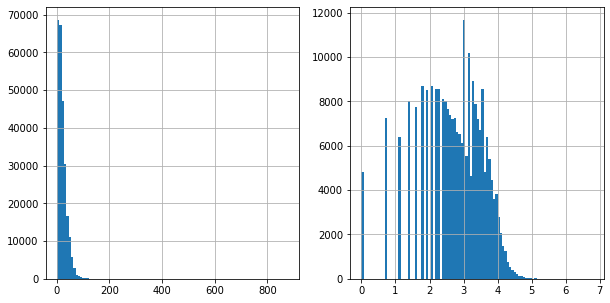

In [98]:
#데이터 분포 확인

fg, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,5])
past[target_col].hist(bins=100, ax=ax[0])
past[target_col].apply(np.log).hist(bins=100, ax=ax[1])

In [99]:
train_selector = past.visit_date < '2017-02-01'
X_train = past[train_selector][use_cols]
#target이 정규분포가 아니기 때문에 로그변환을 해 줌.
y_train = past[train_selector][target_col].apply(np.log1p)

print('Training set dimensions...')
print('- X_train:', X_train.shape)
print('- y_train:', y_train.shape)

Training set dimensions...
- X_train: (194235, 34)
- y_train: (194235,)


In [100]:
val_selector = past.visit_date >= '2017-02-01'
X_test = past[val_selector][use_cols]
y_test = past[val_selector][target_col].apply(np.log1p)

print('Validation set dimensions...')
print('- X_tset:', X_test.shape)
print('- y_test:', y_test.shape)

Validation set dimensions...
- X_tset: (57873, 34)
- y_test: (57873,)
